## Machine Translation Using a Seq2Seq Architecture

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate since that requires much more training data, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [1]:
import pandas as pd
import numpy as np

## Getting the data

We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [3]:
english = pd.read_csv('data/en.csv', names=['eng_sentence'])
english.head()

,eng_sentence
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [4]:
french = pd.read_csv('data/fr.csv', names=['fr_sentence'])
french.head()

,fr_sentence
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [5]:
print('The english file contains {} sentences and the french file contains {} sentences.'.format(english.shape[0], french.shape[0]))

The english file contains 137860 sentences and the french file contains 137860 sentences.


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [6]:
df = pd.concat([english, french], axis=1)
df.head()

,eng_sentence,fr_sentence
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [7]:
df.rename(columns={'eng_sentence': 'english', 'fr_sentence': 'french'}, inplace=True)
df.head()

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [8]:
print("English: " + df['english'][0] + "\nFrench: " + df['french'][0])

English: new jersey is sometimes quiet during autumn , and it is snowy in april .
French: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [9]:
import re
df['english'] = df['english'].str.replace('[^\w\s]','')
df['french'] = df['french'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [10]:
print("English: " + df['english'][0] + "\nFrench: " + df['french'][0])

English: new jersey is sometimes quiet during autumn and it is snowy in april 
French: new jersey est parfois calme pendant l automne et il est neigeux en avril 


## Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [11]:
def get_length(text):
  return len(text.split())

In [12]:
df['ENG Length'] = df['english'].apply(get_length)
df['FR Length'] = df['french'].apply(get_length)

In [13]:
df.head()

,english,french,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn an...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
2,california is usually quiet during march and i...,california est généralement calme en mars et i...,13,13
3,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et il...,14,13
4,your least liked fruit is the grape but my lea...,votre moins aimé fruit est le raisin mais mon ...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

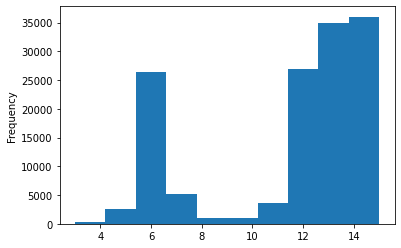

In [14]:
df['ENG Length'].plot.hist()

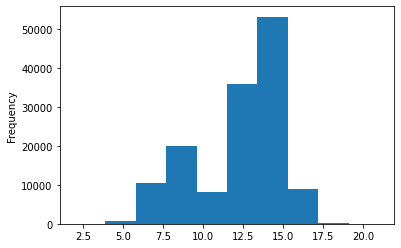

In [15]:
df['FR Length'].plot.hist()

Get the maximum length of an english sentence and the maximum length of a french sentence. 

In [16]:
eng_max_length = df['ENG Length'].max()
fr_max_length = df['FR Length'].max()
print("The max length of english sentence: {} \nThe max length of french sentence: {}".format(eng_max_length, fr_max_length))

The max length of english sentence: 15 
The max length of french sentence: 21


## Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded. 

#### Tokenization

Tokenize the sentences that we have.

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

eng_token = Tokenizer(filters='', lower = False)
eng_token.fit_on_texts(df['english'])
eng_tokenized = eng_token.texts_to_sequences(df['english'])

fr_token = Tokenizer(filters='', lower = False)
fr_token.fit_on_texts(df['french'])
fr_tokenized = fr_token.texts_to_sequences(df['french'])


**How many unique words do we have in english and in french?**

In [18]:
eng_vocab = len(eng_token.word_index)+1
fr_vocab = len(fr_token.word_index)+1
print("English unique words: {} \nFrench unique words: {}".format(eng_vocab, fr_vocab))

English unique words: 200 
French unique words: 346


#### Padding

Perform padding on the sequences that we have.

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
eng_padded = pad_sequences(eng_tokenized, maxlen=eng_max_length, padding='post')

fr_padded = pad_sequences(fr_tokenized, maxlen=fr_max_length, padding='post')

In [20]:
print ('English: {} \nFrench: {}'.format(eng_padded.shape, fr_padded.shape))

English: (137860, 15) 
French: (137860, 21)


## Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed

model = Sequential()
model.add(Embedding(eng_vocab, 128,  input_length=eng_max_length,mask_zero=True))
model.add(LSTM(256))
model.add(RepeatVector(fr_max_length))
model.add(LSTM(256,  return_sequences=True))
model.add(TimeDistributed(Dense(fr_vocab, activation='softmax'))) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 128)           25600     
                                                                 
 lstm_6 (LSTM)               (None, 256)               394240    
                                                                 
 repeat_vector_3 (RepeatVect  (None, 21, 256)          0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 21, 256)           525312    
                                                                 
 time_distributed_3 (TimeDis  (None, 21, 346)          88922     
 tributed)                                                       
                                                                 
Total params: 1,034,074
Trainable params: 1,034,074
No

Compile and train the model. 
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10)
final_model = model.fit(eng_padded, fr_padded, epochs=20, batch_size=512, validation_split = 0.2, callbacks=[early_stop])

Epoch 1/20
216/216 [==============================] - 19s 37ms/step - loss: 2.5526 - accuracy: 0.4861 - val_loss: 2.0572 - val_accuracy: 0.5161
Epoch 2/20
216/216 [==============================] - 6s 30ms/step - loss: 1.6201 - accuracy: 0.5888 - val_loss: 1.4229 - val_accuracy: 0.6163
Epoch 3/20
216/216 [==============================] - 6s 30ms/step - loss: 1.2790 - accuracy: 0.6383 - val_loss: 1.1196 - val_accuracy: 0.6731
Epoch 4/20
216/216 [==============================] - 6s 30ms/step - loss: 1.0121 - accuracy: 0.7010 - val_loss: 0.9187 - val_accuracy: 0.7265
Epoch 5/20
216/216 [==============================] - 7s 30ms/step - loss: 0.8431 - accuracy: 0.7492 - val_loss: 0.7677 - val_accuracy: 0.7757
Epoch 6/20
216/216 [==============================] - 7s 31ms/step - loss: 0.7139 - accuracy: 0.7898 - val_loss: 0.6996 - val_accuracy: 0.7918
Epoch 7/20
216/216 [==============================] - 7s 31ms/step - loss: 0.6139 - accuracy: 0.8200 - val_loss: 0.5683 - val_accuracy: 0.833

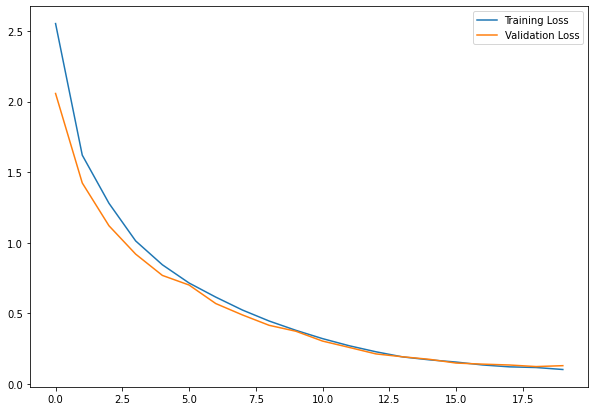

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
a, = plt.plot(final_model.history['loss'],label='Training Loss')
b, = plt.plot(final_model.history['val_loss'],label='Validation Loss')
plt.legend(handles=[a,b])
plt.show()

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [27]:
def translate(input, tokenizer):
    input = [input]
    test_tokenized = eng_token.texts_to_sequences(input)
    test_padded = pad_sequences(test_tokenized, maxlen=eng_max_length, padding='post')

    predictions = model.predict(test_padded)[0]

    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = ''
    return ' '.join([index_to_words[prediction] for prediction in np.argmax(predictions, 1)])


Test the following sentence

In [28]:
input = "she is driving the truck"

print('English: '+input)
print('French: elle conduit le camion')
print('Predicted: '+translate(input, fr_token))

English: she is driving the truck
French: elle conduit le camion
Predicted: elle conduit le camion vert rouillé               


**Improve the model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation.**

Create a new model called model2

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed, Bidirectional

model2 = Sequential()
model2.add(Embedding(eng_vocab, 128, input_length=eng_max_length,mask_zero=True))
model2.add(Bidirectional(LSTM(256), merge_mode='concat'))
model2.add(RepeatVector(fr_max_length))
model2.add(Bidirectional(LSTM(256,  return_sequences=True), merge_mode='concat'))
model2.add(TimeDistributed(Dense(fr_vocab, activation='softmax')))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 128)           25600     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              788480    
 l)                                                              
                                                                 
 repeat_vector_4 (RepeatVect  (None, 21, 512)          0         
 or)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 21, 512)          1574912   
 nal)                                                            
                                                                 
 time_distributed_4 (TimeDis  (None, 21, 346)          177498    
 tributed)                                            

compile and train your new model.

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10)
final_model2 = model2.fit(eng_padded, fr_padded, epochs=50, batch_size=512, validation_split = 0.3, callbacks=[early_stop])

Epoch 1/50
189/189 [==============================] - 17s 90ms/step - loss: 2.1674 - accuracy: 0.5222 - val_loss: 1.5127 - val_accuracy: 0.5944
Epoch 2/50
189/189 [==============================] - 13s 70ms/step - loss: 1.2523 - accuracy: 0.6614 - val_loss: 1.0740 - val_accuracy: 0.7051
Epoch 3/50
189/189 [==============================] - 13s 70ms/step - loss: 0.9338 - accuracy: 0.7335 - val_loss: 0.8051 - val_accuracy: 0.7665
Epoch 4/50
189/189 [==============================] - 13s 68ms/step - loss: 0.7015 - accuracy: 0.7952 - val_loss: 0.5961 - val_accuracy: 0.8254
Epoch 5/50
189/189 [==============================] - 13s 69ms/step - loss: 0.5112 - accuracy: 0.8487 - val_loss: 0.4300 - val_accuracy: 0.8760
Epoch 6/50
189/189 [==============================] - 13s 69ms/step - loss: 0.3714 - accuracy: 0.8920 - val_loss: 0.3289 - val_accuracy: 0.9057
Epoch 7/50
189/189 [==============================] - 13s 70ms/step - loss: 0.2828 - accuracy: 0.9186 - val_loss: 0.2603 - val_accuracy:

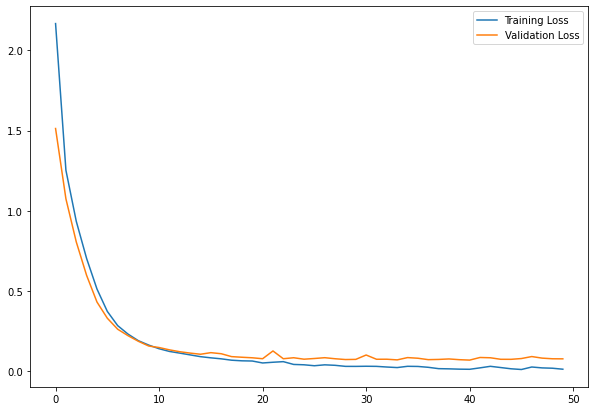

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
a, = plt.plot(final_model2.history['loss'],label='Training Loss')
b, = plt.plot(final_model2.history['val_loss'],label='Validation Loss')
plt.legend(handles=[a,b])
plt.show()

Define a new function that relies on your new model to make predictions.

In [1]:
def translate2(input, tokenizer):
    input = [input]
    test_tokenized = eng_token.texts_to_sequences(input)
    test_padded = pad_sequences(test_tokenized, maxlen=eng_max_length, padding='post')

    predictions = model2.predict(test_padded)[0]

    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = ''
    return ' '.join([index_to_words[prediction] for prediction in np.argmax(predictions, 1)])


In [ ]:
input = "she is driving the truck"

print('English: '+input)
print('French: elle conduit le camion')
print('Predicted: '+translate2(input, fr_token))

English: she is driving the truck
French: elle conduit le camion
Predicted: elle conduit le camion                 
